# EZ: Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import glob as glob
import pdf_ccdf
import h5py
import sys
sys.path.append('/home/santiago_b/ez_model/src/')
import model as ez

In [2]:
plt.rcParams.update({'font.size': 20})
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["font.serif"] = "Times New Roman"

## Load data

In [3]:
# Choose input directory
# idir = '../200x40/'
# idir = '../400x80/'
# idir = '../128x128/'
idir = '../256x256/'

# Choose output directory
odir = './Figures/'

In [4]:
# Searches through all directories in 'Data' folder (which are named after experiments) and imports the data:
dirs = sorted(glob.glob(idir+'q*'))

runs = []
for file in dirs:
    run = file.split('/')[2]
    runs.append(run)

# Sort run-names based on value of q_in
runs = sorted(runs, key=lambda x: float(x.split('_')[1].replace('d','.')), reverse=False)

print(runs)

['q_1d000000e-01', 'q_1d359356e-01', 'q_1d847850e-01', 'q_2d511886e-01', 'q_3d414549e-01', 'q_4d641589e-01', 'q_6d309573e-01', 'q_8d576959e-01', 'q_1d165914e+00', 'q_1d584893e+00', 'q_2d154435e+00', 'q_2d928645e+00', 'q_3d981072e+00', 'q_5d411695e+00', 'q_7d356423e+00', 'q_1d000000e+01']


In [5]:
qins = [float(x.split('_')[1].replace('d','.')) for x in runs]
print(qins)

[0.1, 0.1359356, 0.184785, 0.2511886, 0.3414549, 0.4641589, 0.6309573, 0.8576959, 1.165914, 1.584893, 2.154435, 2.928645, 3.981072, 5.411695, 7.356423, 10.0]


In [6]:
for q_in in qins:
    if q_in<1:
        q_in_real = 1/int(1/q_in)
        print("q_in = %s, q_in real = %s" % (q_in,q_in_real))
    else:
        q_in_real = int(q_in)
        print("q_in > 1",int(q_in))

q_in = 0.1, q_in real = 0.1
q_in = 0.1359356, q_in real = 0.14285714285714285
q_in = 0.184785, q_in real = 0.2
q_in = 0.2511886, q_in real = 0.3333333333333333
q_in = 0.3414549, q_in real = 0.5
q_in = 0.4641589, q_in real = 0.5
q_in = 0.6309573, q_in real = 1.0
q_in = 0.8576959, q_in real = 1.0
q_in > 1 1
q_in > 1 1
q_in > 1 2
q_in > 1 2
q_in > 1 3
q_in > 1 5
q_in > 1 7
q_in > 1 10


Let's import the data for each run now:

In [7]:
# data = dict([])
# for run in runs:
#     file = glob.glob(idir+run+'/*_scalars.h5')
#     data[run] = read_dedalus(idir+run)

Let's see what is in our imported variables.

We saved the data in what's called a 'dictionary', which names its variables with strings. To see the experiments do the following:

In [8]:
for run in runs[1:2]:
    fname = str(glob.glob(idir+run+'/*_scalars.h5')[0])
    f = h5py.File(fname,'r')
    print(run)
    for subdat in f:
        print(subdat)
        print(f[subdat].keys())
#         print(subdat['tasks'].keys())
#         print(subdat['scales']['sim_time'][:])
    f.close()

q_1d359356e-01
parameters
<KeysViewHDF5 ['Nx', 'Ny', 'c_0', 'dt', 'f', 'q_in', 'rho', 'skipmax']>
scalars
<KeysViewHDF5 ['bed_activity', 'q_mid', 'q_out', 'time', 'tstep']>


In [9]:
# Scale for coloring:
def cscale_qins(q_in,qins):
    maxt = np.sqrt(np.max(qins))
    mint = np.sqrt(np.min(qins))
    return (np.sqrt(q_in) - mint)/(maxt-mint)

# Snapshots

In [17]:
# # Get parameters:
# fname = str(glob.glob(idir+run+'/*_scalars.h5')[0])
# file = h5py.File(fname,'r')
# file.close()

In [10]:
slopes = []
qs = []
# Choose run
for ii,run in enumerate(runs):
    q_in=qins[ii]
#     if q_in<1e-1:
#     if (q_in==0.07943282) or (q_in == 0.1):
    # Get parameters:
    fname = str(glob.glob(idir+run+'/*_scalars.h5')[0])
    file = h5py.File(fname,'r')
    Nx = file['parameters']['Nx'][()]
    Ny = file['parameters']['Ny'][()]
    c_0 = file['parameters']['c_0'][()]
    f = file['parameters']['f'][()]
    q_in = file['parameters']['q_in'][()]
    skipmax = file['parameters']['skipmax'][()]
    file.close()

    # Initialize
    set_q = ez.set_q(Nx, Ny, c_0, f, skipmax,q_in)

    # Load data:
    set_q.load_data(str(glob.glob(idir+run+'/*_state.h5')[0]))

    # Plot
    print("q_in = %s" % q_in)
    
    if q_in<1:
        q_in_real = 1/int(1/q_in)
        print("q_in real",q_in_real)
    else:
        q_in_real = int(q_in)
        print("q_in > 1",int(q_in))
    qs.append(q_in_real)
#     set_q.plot_min()

    z_avg = np.mean(set_q.z[:,5:-5],axis=0)
    x = np.arange(len(z_avg))
    m,b = np.polyfit(x,z_avg,1)
    slopes.append(m)

# # Choose a snapshot
# n_max = data[run][-1]['scales']['write_number'][-1]-1 # n_max is frame number, but with python we have to subtract one
# n = n_max #100
# s,n = snapshot_slice(n,data[run],'u')

# # Read info:
# time = data[run][s]['scales']['sim_time'][n]

# # Define array for x and z axes
# X = data[run][s]['scales']['x']['1.0'][:]
# Z = data[run][s]['scales']['y']['1.0'][:]
# L = H = round(np.max(X))
# # H = round(2*np.max(Z))

# # Choose quantity to look at
# field = 'u'

# plt_dat = np.transpose(data[run][s]['tasks'][field][n,:,:])

# # Find max{|T'|} to make proper, symmetric colorbar:
# cbarlim = np.max(np.abs(plt_dat))

# # Plot!
# size = 10
# plt.figure(figsize=(size,size*(H/L)))
# plt.pcolor(X,Z,plt_dat,vmin=-cbarlim,vmax=cbarlim,cmap='bwr')
# cb=plt.colorbar()
# cb.set_label(field)
# ax=plt.gca()
# ax.set_aspect(1)
# # plt.title(r'$\Omega = %.2f$, t = %.2f' % (var['Omega'],var['time'][n]),fontsize=18)
# plt.title(r'time = %f' % time,fontsize=15)
# plt.show()

q_in = 0.1
q_in real 0.1
q_in = 0.13593563908785256
q_in real 0.14285714285714285
q_in = 0.18478497974222907
q_in real 0.2
q_in = 0.251188643150958
q_in real 0.3333333333333333
q_in = 0.34145488738336016
q_in real 0.5
q_in = 0.46415888336127786
q_in real 0.5
q_in = 0.6309573444801934
q_in real 1.0
q_in = 0.8576958985908941
q_in real 1.0
q_in = 1.1659144011798317
q_in > 1 1
q_in = 1.5848931924611134
q_in > 1 1
q_in = 2.1544346900318834
q_in > 1 2
q_in = 2.9286445646252357
q_in > 1 2
q_in = 3.981071705534973
q_in > 1 3
q_in = 5.411695265464638
q_in > 1 5
q_in = 7.3564225445964135
q_in > 1 7
q_in = 10.0
q_in > 1 10


0.079 --> 186 iter/sec

# Time series

$$ q^*_{in} = \frac{q_{in}}{\tilde{\Delta t}_{s}} \frac{4}{3} \pi \frac{1}{\tilde{b}} \left(\frac{\rho_w}{\rho_s - \rho_w}\right)^{1/2}$$

In [ ]:
qm = []
qs = []
for ii,run in enumerate(runs):
    q_in=qins[ii]
    #     if q_in>1:#
#     if q_in<1e-1:
    # Open 
    fname = str(glob.glob(idir+run+'/*_scalars.h5')[0])
    file = h5py.File(fname,'r')

    # Get parameters:
    Nx = file['parameters']['Nx'][()]
    Ny = file['parameters']['Ny'][()]
    c_0 = file['parameters']['c_0'][()]
    f = file['parameters']['f'][()]
    q_in = file['parameters']['q_in'][()]
    skipmax = file['parameters']['skipmax'][()]
    rho = 0.8
    dt = file['parameters']['dt'][()]
    if q_in<1:
        q_in_real = 1/int(1/q_in)
        print("q_in real",q_in_real)
    else:
        q_in_real = int(q_in)
        print("q_in > 1",int(q_in))

    # Normalize
    norm = dt**-1 * (4/3.) * np.pi * 1/float(Ny) * rho
    q8_in = norm*q_in_real

    # Get time-series ['bed_activity', 'q_out', 'time', 'tstep']
    time = file['scalars']['time'][()]
    tstep = file['scalars']['tstep'][()]
    q_out = file['scalars']['q_out'][()]
    q8_out = q_out*norm
    bed_activity = file['scalars']['bed_activity'][()]

    # Close file:
    file.close()

    # Data avg
    qm.append(np.mean(q_out[-120:])/q_in_real)
    qs.append(q_in_real)

#     # plot
#     plt.figure(1)
#     plt.plot(q_out/q_in_real,'.-',color = ((ii+1)/len(runs),0,0,1),label=run)

#     plt.figure(2)
#     plt.semilogy(bed_activity,'.-',color = ((ii+1)/len(runs),0,0,1),label=run)

#     plt.figure(3)
#     if ii==0:
#         plt.axhline(y=q8_in,color='k',ls='--',label=r'$q_{in}^*$',alpha=0.5)
#     else:
#         plt.axhline(y=q8_in,color='k',ls='--',alpha=0.5)
#     plt.semilogy(q8_out,'.-',color = ((ii+1)/len(runs),0,0,1),label=run)

plt.figure(1)
plt.legend(loc=(1.01,0.0))
plt.axhline(y=1,color='b')
plt.ylim(0.0,1.5)
# plt.xlabel("Time Step")
plt.ylabel(r"$q_{out}/q_{in}$")

plt.figure(2)
plt.legend(loc=(1.01,0.0))
# plt.xlabel("Time Step")
plt.ylabel(r"Bed Activity")

plt.figure(3)
plt.legend(loc=(1.01,0.0))
# plt.xlabel("Time Step")
plt.ylabel(r'$q_{out}^*$')
# plt.ylim(2e-5,5e-2)
# plt.ylim(2e-6,5e-3)
plt.show()

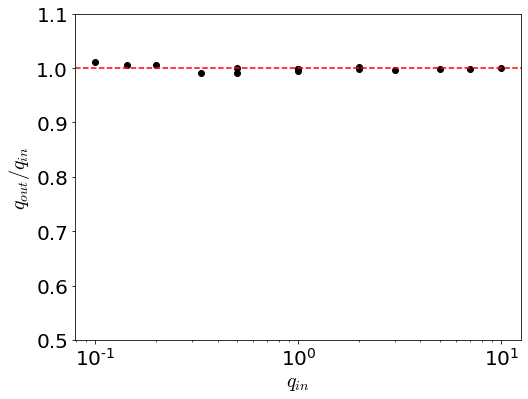

In [13]:
plt.figure(figsize=(8,6))
plt.semilogx(qs,qm,'ok')
plt.axhline(y=1,c='r',ls='--')
plt.xlabel(r"$q_{in}$",fontsize=20)
plt.ylabel(r"$q_{out}/q_{in}$",fontsize=20)
plt.ylim(0.5,1.1)
plt.show()

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


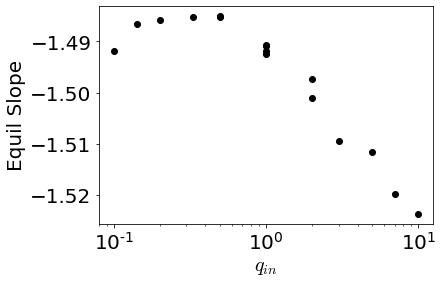

In [11]:
slope_c = np.sqrt((1/(9*set_q.c_0**2))-1)

plt.semilogx(qs,slopes,'ok')
# plt.axhline(y=-slope_c,c='r',ls='--')
plt.xlabel(r"$q_{in}$")
plt.ylabel(r"Equil Slope")
plt.show()